In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Task 10. Saxpy
By using `CuPy`, implement `SAXPY` function. The function is described in the picture.

### 10.1 
**Q1 Difference between CuPy and NumPy**

NumPy is designed to run on CPU so the parallelization capabilities are limited by the number of available CPU cores. CuPy is the implementation of Numpy adapted to be run on GPU through the CUDA library. Therefore, the usage of CuPy allows achieving a superior speed-up utilizing GPU resources.

**Q2 How does CuPy handles data transfer between CPU and GPU**

CuPy uses memory pool for memory allocations by default. For the purposes of CPU-to-GPU data transfer CuPy used pinned memory pool (non-swappable CPU memory). The memory pool significantly improves the performance by mitigating the overhead of memory allocation and CPU/GPU synchronization.



### 10.2 SAXPY implementation

In [2]:
def saxpy(x: cp.array, y: cp.array, a: float) -> cp.array:
    assert x.shape[0] == y.shape[0], 'x and y should be the same lenth!'
    return a * x + y

### 10.3 NumPy vs CuPy profiling

In [3]:
out_cupy, out_numpy = [], []
alpha : float = 5
for n in range(3, 8):
    size : int = 10**n
    arr_cupy, arr_numpy  = cp.random.random(size), np.random.random(size)
    
    res_cupy  = %timeit -n 100 -o saxpy(arr_cupy, arr_cupy, alpha)
    res_numpy = %timeit -n 100 -o saxpy(arr_numpy, arr_numpy, alpha)
    
    out_cupy.append((size, res_cupy.average, res_cupy.stdev))
    out_numpy.append((size, res_numpy.average, res_numpy.stdev))

The slowest run took 152.18 times longer than the fastest. This could mean that an intermediate result is being cached.
763 µs ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.3 µs ± 238 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
34.9 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.8 µs ± 946 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
34.9 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
146 µs ± 6.35 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
38.3 µs ± 5.06 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.28 ms ± 37 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 23.32 times longer than the fastest. This could mean that an intermediate result is being cached.
198 µs ± 268 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
35.5 ms ± 667 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
out_cupy, out_numpy= np.array(out_cupy), np.array(out_numpy)
arr_size, time_cupy, std_cupy  = out_cupy[:,0], out_cupy[:,1], out_cupy[:,2]
time_numpy, std_numpy = out_numpy[:,1], out_numpy[:,2]

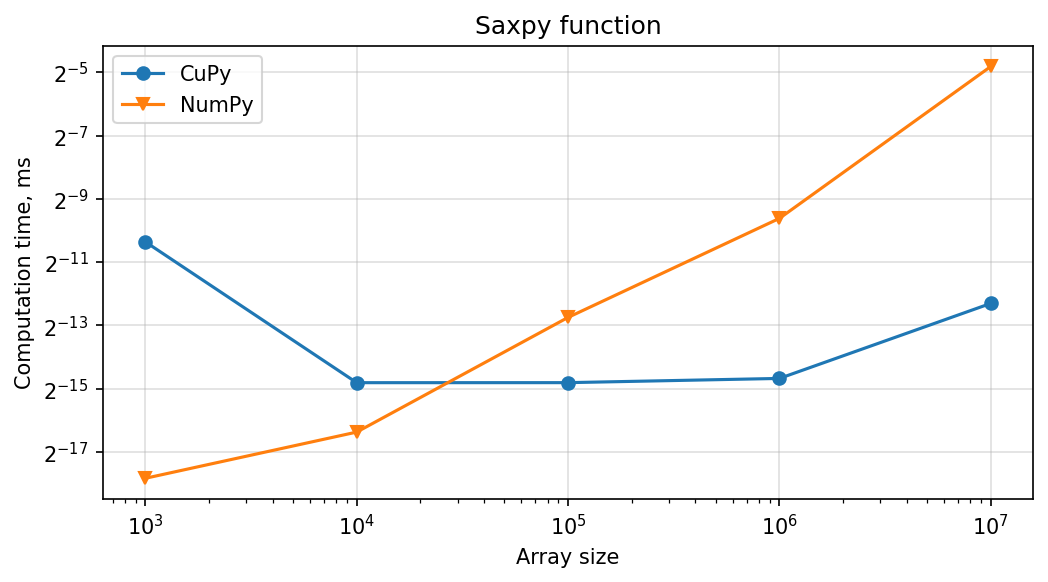

In [5]:
fig, ax = plt.subplots(figsize=(8,4), dpi=150)
ax.plot(arr_size, time_cupy, '-o', label='CuPy')
ax.plot(arr_size, time_numpy, '-v', label='NumPy')
ax.set_xticks(arr_size)
ax.grid(alpha=.4)
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=2)
ax.set_xlabel('Array size')
ax.set_ylabel('Computation time, ms')
plt.legend()
plt.title('Saxpy function')
plt.show()

# Task 11. CuPy-based Bifurcation map

By using **CuPy**, reimplement bifurcation map (Task 1).